In [ ]:
import tensorflow as tf
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
[-1, 0 , 15]
34 
35 

In [ ]:
# Using CIFAR-10 dataset, change train and test vars appropriately 

def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

#plot metrics
def Loss_ACC_plot(history):
	# plot loss
    plt.figure()
    plt.subplot(1,2,1)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='validation')
    # plot accuracy
    plt.subplot(1,2,2)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='validation')
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 23 11:27:26 2021
@author: Pablo
"""

#Ensure that we are using GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            print(tf.test.gpu_device_name())
    except RuntimeError as e:
        print(e)


x_train, y_train, x_test, y_test = load_dataset()
# prepare pixel data
x_train, x_test = prep_pixels(x_train, x_test)
# define model
model = define_model()
# fit model
history = model.fit(x_train, y_train,validation_split=.2, epochs=100,shuffle = True, batch_size=64)

/device:GPU:0
Epoch 1/100
625/625 [==============================] - 7s 9ms/step - loss: 2.2180 - accuracy: 0.1708 - val_loss: 1.8350 - val_accuracy: 0.3333
Epoch 2/100
625/625 [==============================] - 5s 8ms/step - loss: 1.7969 - accuracy: 0.3389 - val_loss: 1.5684 - val_accuracy: 0.4272
Epoch 3/100
625/625 [==============================] - 5s 8ms/step - loss: 1.6192 - accuracy: 0.4021 - val_loss: 1.5209 - val_accuracy: 0.4508
Epoch 4/100
625/625 [==============================] - 5s 8ms/step - loss: 1.5313 - accuracy: 0.4381 - val_loss: 1.4168 - val_accuracy: 0.4904
Epoch 5/100
625/625 [==============================] - 5s 8ms/step - loss: 1.4487 - accuracy: 0.4702 - val_loss: 1.3263 - val_accuracy: 0.5311
Epoch 6/100
625/625 [==============================] - 5s 8ms/step - loss: 1.3820 - accuracy: 0.4959 - val_loss: 1.2817 - val_accuracy: 0.5380
Epoch 7/100
625/625 [==============================] - 5s 8ms/step - loss: 1.3255 - accuracy: 0.5197 - val_loss: 1.2044 - val_ac

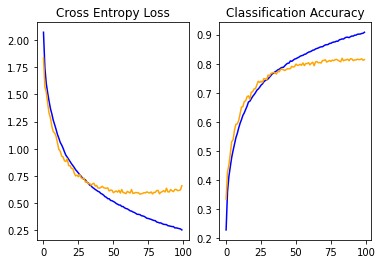

In [ ]:
Loss_ACC_plot(history)

In [ ]:
import numpy as np
y_pred = model.predict(x_test)
y_pred= np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_test = np.argmax(y_test, axis=1)
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)
ACC = np.trace(cmatrix)/np.sum(cmatrix)
print('Testing Acc: ', ACC)

[[786  12  45  20  16   3  13  11  61  33]
 [  9 878   2   0   2   4   8   1  21  75]
 [ 34   2 709  39  68  43  72  13  11   9]
 [ 12   5  42 629  73 115  74  22  11  17]
 [  7   2  32  33 828  13  45  34   5   1]
 [  4   2  15 154  57 707  29  24   4   4]
 [  2   1  30  34  12   9 902   3   4   3]
 [  4   0  19  39  49  34  10 833   3   9]
 [ 23   8   7  14   6   1   6   4 911  20]
 [ 14  39   1   9   3   2   3   3  19 907]]
Testing Acc:  0.809
